<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231226_WordCloud_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WroldCloud 시각화
##워드 클라우드란

자료의 빈도를 시각적으로 나타내는 시각화\
텍스트 빈도수에 따라 크게 나타냄

!sudo apt-get install -y fonts-nanum\
‣ !sudo fc-cache -fv\
‣ !rm ~/.cache/matplotlib -rf\
‣ !pip install wordcloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,764 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 1. 파일 읽어오기
from wordcloud import WordCloud
text =open('alice.txt').read()
text

In [ ]:
# 2. 빈도계산
wordcloud=WordCloud().generate(text)
wordcloud
wordcloud.words_

In [ ]:
# 3. 워드클라우드 생성
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')     #좌표단위 제거
plt.show()

In [ ]:
# 글자 수 제한 (최대 100개 단어 표현)
import matplotlib.pyplot as plt
wordcloud=WordCloud(max_words=100).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# 4. 불용어 처리
from wordcloud import STOPWORDS
STOPWORDS
type(STOPWORDS)     #set -> 중복값 없음

In [ ]:
# 4-1. 불용어 추가
STOPWORDS.add('said')
print(STOPWORDS)

In [ ]:
# 시각화
wordcloud=WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# 마스크를 이용한 시각화 1
from PIL import Image
import numpy as np
#이미지를 불러와 ndarray로 바꾼 데이터를 alice_mask로 저장
word_mask=np.array(Image.open('/content/picture.png'))
word_mask

In [ ]:
# 마스크를 이용한 시각화 2
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# 마스크를 이용한 시각화 1
from PIL import Image
import numpy as np
#이미지를 불러와 ndarray로 바꾼 데이터를 alice_mask로 저장
word_mask=np.array(Image.open('/content/tree.jpg'))
word_mask

In [ ]:
# 마스크를 이용한 시각화 2
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 크롤링으로 WorldCloud

In [ ]:
from bs4 import BeautifulSoup
import requests
import time
questions = []

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh;Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

for i in range(1, 30):
#페이지네이션 적용
    res = requests.get("https://qna.programmers.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")
    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
#빈칸이 너무많아 strip()으로 처리
            questions.append(li.text.strip())
    time.sleep(0.5)

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 36.9 MB/s eta 0:00:00


In [ ]:
# 횟수를 기반으로 딕셔너리 생성
from collections import Counter
# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum
words = []
hannanum = Hannanum()
#문장이 아니라 지금은 리스트이기 때문에 for문을 돌면서 각각의 형태소를 분석.
for question in questions:
 nouns = hannanum.nouns(question) #한 번 반복할 때 나오는 명사들
 words += nouns #word에 누적.

# counter를 이용해 각 단어의 개수.
counter = Counter(words)
counter

In [ ]:
#시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud2 = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000
)
img = wordcloud2.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

In [ ]:
# 마스크를 이용한 시각화 2
# wordcloud2=WordCloud(max_words=100,
#     font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
#     stopwords=STOPWORDS,
#     mask=word_mask,
#     background_color='ivory').generate(text)
# plt.figure(figsize=(15,10))
# plt.imshow(wordcloud2)
img = wordcloud2.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

In [ ]:
img = wordcloud2.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://news.tvchosun.com/site/data/html_dir/2023/12/25/2023122590126.html')
soup = bs(res.content, 'html.parser')
result = soup.select('.article font03 p')
data = []
for num in result:
 data.append(num.text)
data

In [ ]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=f422d6e3d3426acad11ea337aef996ce9fdfb5f4c04a4bc4095cc3dd18aa3c10
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=411b9fc13089f33c1db6f45eb238d68be43b4db28cba02e6a5897f554617d817
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
import newspaper as news
link = "https://www.newsis.com/view/?id=NISX20231224_0002569657&cID=10201&pID=10200"
article = news.Article(link, language='ko')
article.download()
article.parse()
article.text

{'shall', 'there', 'before', 'that', 'ourselves', "they've", 'yours', 'has', 'k', "they're", 'until', 'just', 'were', 'by', "mustn't", 'ever', 'from', 'like', 'over', 'such', "you'll", 'on', 'have', 'than', "couldn't", 'to', 'cannot', 'get', "doesn't", 'our', 'when', 'did', "i'd", "she'll", 'himself', "can't", 'we', 'doing', 'having', 'been', 'where', "wasn't", 'again', "why's", "she's", 'of', 'ought', 'who', 'yourself', 'it', 'against', 'any', 'does', "you've", "let's", 'its', 'a', "she'd", 'be', 'the', "don't", 'itself', 'down', "hadn't", 'ours', 'some', 'http', 'above', "he's", "we're", "where's", 'can', "wouldn't", 'herself', 'and', 'how', 'an', 'i', 'very', "shouldn't", 'is', 'more', "shan't", "it's", 'other', 'through', 'she', 'these', 'too', 'with', 'if', 'few', "they'll", 'nor', 'you', "i'm", 'otherwise', 'being', "i've", 'which', 'him', 'all', 'themselves', 'while', 'are', 'no', 'about', "that's", "we've", 'me', 'each', "hasn't", 'therefore', 'they', 'hers', "won't", 'below', 

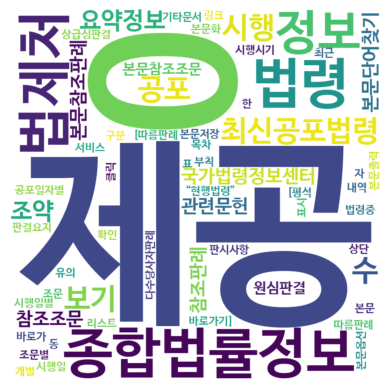

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum

# URL of the news article
news_url = 'https://glaw.scourt.go.kr/wsjo/panre/sjo100.do?contId=2060990&q=%EC%9E%84%EB%8C%80%EC%B0%A8%EA%B3%84%EC%95%BD&nq=&w=panre&section=panre_tot&subId=&csq=&groups=&category=&outmax=1&msort=&onlycount=&sp=&d1=&d2=&d3=&d4=&d5=&pg=0&p1=&p2=&p3=&p4=&p5=&p6=&p7=&p8=&p9=&p10=&p11=&p12=&sysCd=&tabGbnCd=&saNo=&joNo=&lawNm=&hanjaYn=N&userSrchHistNo=&poption=&srch=&range=&daewbyn=N&smpryn=N&idgJyul=&newsimyn=&trtyNm=&orderBy=LAWOD_HGUL_NM+ASC&hhangYn=Y&startChr=&endChr=&lawodPyunbCd=&bubjongGbnCd=&lawodPjjgCd=&lawodSogwanbcCd=&trtyGbnCd=&trtyRlmCd=&natnGroupCd=&natnCd=&frmntnYn=&frmntnYear='

# Fetch the webpage content
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(news_url, headers=headers)
html_content = response.text

# Extract text from HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()

# Korean Morphological Analysis to extract nouns
hannanum = Hannanum()
nouns = hannanum.nouns(text)

# Count the frequency of each noun
counter = Counter(nouns)

# 4. 불용어 처리
from wordcloud import STOPWORDS
STOPWORDS
type(STOPWORDS)     #set -> 중복값 없음

# 4-1. 불용어 추가
# STOPWORDS.add('왜')
# STOPWORDS.add('당')
print(STOPWORDS)

# Create a word cloud
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
    stopwords=STOPWORDS,
    width=1000,
    height=1000,
    background_color='white'
).generate_from_frequencies(counter)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# # 마스크를 이용한 시각화 2
# wordcloud=WordCloud(max_words=100,
#     font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
#     stopwords=STOPWORDS,
#     mask=word_mask,
#     background_color='ivory').generate(text)
# plt.figure(figsize=(15,10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

제공: 8
0: 7
종합법률정보: 4
법령: 4
법제처: 4
정보: 3
최신공포법령: 2
보기: 2
시행: 2
공포: 2
수: 2
요약정보: 2
조약: 2
국가법령정보센터: 2
본문단어찾기: 2
관련문헌: 2
참조판례: 2
참조조문: 2
본문참조판례: 2
본문참조조문: 2
원심판결: 2
링크: 1
목차: 1
리스트: 1
본문: 1
바로가: 1
공포일자별: 1
구분: 1
법령중: 1
최근: 1
동: 1
한: 1
자: 1
개별: 1
조문: 1
시행시기: 1
부칙: 1
시행일: 1
유의: 1
조문별: 1
내역: 1
본문화: 1
상단: 1
바로가기]: 1
클릭: 1
시행일별: 1
“현행법령”: 1
확인: 1
표시: 1
서비스: 1
표: 1
따름판례: 1
[따름판례: 1
[평석: 1
다수당사자판례: 1
기타문서: 1
상급심판결: 1
판시사항: 1
판결요지: 1
본문옵션: 1
본문출력: 1
본문저장: 1
{"won't", 'very', "let's", "i'll", "weren't", 'of', 'while', 'ought', 'my', 'or', 'if', 'through', 'be', 'you', 'by', 'else', "can't", 'that', "i'd", 'there', 'few', '추가할_불용어1', 'and', 'was', 'into', 'doing', 'herself', 'because', 'otherwise', 'more', "they've", 'between', "hasn't", 'all', "mustn't", 'www', "who's", 'being', "he's", "he'll", "we'll", "she'd", 'him', 'then', 'above', "you'll", "wasn't", 'would', 'been', 'shall', 'these', 'his', 'k', 'were', 'just', 'both', 'off', 'those', "what's", 'having', 'however', 'from', "doesn't", 'any', 

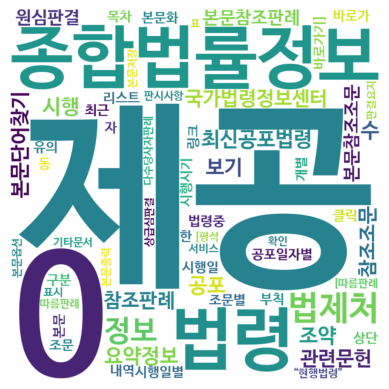

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum

# URL of the news article
news_url = 'https://glaw.scourt.go.kr/wsjo/panre/sjo100.do?contId=2060990&q=%EC%9E%84%EB%8C%80%EC%B0%A8%EA%B3%84%EC%95%BD&nq=&w=panre&section=panre_tot&subId=&csq=&groups=&category=&outmax=1&msort=&onlycount=&sp=&d1=&d2=&d3=&d4=&d5=&pg=0&p1=&p2=&p3=&p4=&p5=&p6=&p7=&p8=&p9=&p10=&p11=&p12=&sysCd=&tabGbnCd=&saNo=&joNo=&lawNm=&hanjaYn=N&userSrchHistNo=&poption=&srch=&range=&daewbyn=N&smpryn=N&idgJyul=&newsimyn=&trtyNm=&orderBy=LAWOD_HGUL_NM+ASC&hhangYn=Y&startChr=&endChr=&lawodPyunbCd=&bubjongGbnCd=&lawodPjjgCd=&lawodSogwanbcCd=&trtyGbnCd=&trtyRlmCd=&natnGroupCd=&natnCd=&frmntnYn=&frmntnYear='

# Fetch the webpage content
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(news_url, headers=headers)
html_content = response.text

# Extract text from HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()

# Korean Morphological Analysis to extract nouns
hannanum = Hannanum()
nouns = hannanum.nouns(text)

# Count the frequency of each noun
counter = Counter(nouns)

# 빈도수를 내림차순으로 정렬
sorted_counter = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))

# 정렬된 빈도수를 출력하여 확인
for word, count in sorted_counter.items():
    print(f'{word}: {count}')

# 4. 불용어 처리
from wordcloud import STOPWORDS
STOPWORDS
type(STOPWORDS)     #set -> 중복값 없음

# 4-1. 불용어 리스트 추가
custom_stopwords = ['0', '제공', '추가할_불용어1', '추가할_불용어2']

STOPWORDS.update(custom_stopwords)

# 확인을 위해 불용어 리스트 출력
print(STOPWORDS)

# Create a word cloud
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
    stopwords=STOPWORDS,
    width=1000,
    height=1000,
    background_color='white'
).generate_from_frequencies(counter)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud
date='20231225'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')
crowled_title = []
for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text)

title = "".join(crowled_title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'","").replace('·', ' ').replace('=',' ').replace('\n',' ')
filtered_title

In [ ]:
tw = Twitter() # Twitter가 Okt로 변경
tokens_ko = tw.nouns(filtered_title)
tokens_ko
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens
ko.vocab()
new_ko=[]
for word in ko:
 if len(word) > 1 and word != '단독' and word != ' ':new_ko.append(word)
new_ko
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()
data = ko.vocab().most_common(150)
data = dict(data)
data

In [ ]:
wordcloud = WordCloud().generate(filtered_title)
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=font,\
 background_color="white", \
 width=1000, \
 height=1000, \
 max_words=100, \
 max_font_size=300)
wc = wc.generate_from_frequencies(data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum
from PIL import Image
import numpy as np

word_mask=np.array(Image.open('tree.jpg'))

# URL of the news article
news_url = 'https://www.newsis.com/view/?id=NISX20231224_0002569657&cID=10201&pID=10200'

# Fetch the webpage content
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(news_url, headers=headers)
html_content = response.text

# Extract text from HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()

# Korean Morphological Analysis to extract nouns
hannanum = Hannanum()
nouns = hannanum.nouns(text)

counter = Counter(nouns)

wordcloud=WordCloud(max_words=100, font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', stopwords=STOPWORDS, mask=word_mask, background_color='ivory').generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# 4. 불용어 처리
from wordcloud import STOPWORDS
STOPWORDS
type(STOPWORDS)     #set -> 중복값 없음

In [ ]:
# 4-1. 불용어 추가
STOPWORDS.add('왜')
STOPWORDS.add('당')
print(STOPWORDS)

In [ ]:
# 마스크를 이용한 시각화 2
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
html

In [ ]:
song=html.select('.ellipsis.rank01>span>a')
song_list=[i.text for i in song]
song_list

singer=html.select('.ellipsis.rank02>span>a')
singer_list=[i.text for i in singer]
singer_list=singer_list[:100]
singer_list

In [ ]:
print(len(singer_list))

In [ ]:
# 랭킹 리스트 생성, 각 리스트 길이 확인
rank_list =[i+1 for i in range(len(song_list))]
print(len(rank_list))
print(len(singer_list))
print(len(song_list))

In [ ]:
top_100={'순위':rank_list, '가수':singer_list, '곡명':song_list}
top_100_df=pd.DataFrame(top_100)
top_100_df

In [ ]:
# 마스크를 이용한 시각화 1
from PIL import Image
import numpy as np
#이미지를 불러와 ndarray로 바꾼 데이터를 alice_mask로 저장
word_mask=np.array(Image.open('/content/melon.jpg'))
word_mask

In [ ]:
# 마스크를 이용한 시각화 2
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(str(singer_list))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud
text =open('hangul_text.txt').read()
text

In [ ]:
wordcloud3=WordCloud().generate(text)
wordcloud3
wordcloud3.words_

In [ ]:
# 마스크를 이용한 시각화 1
from PIL import Image
import numpy as np
#이미지를 불러와 ndarray로 바꾼 데이터를 alice_mask로 저장
word_mask3=np.array(Image.open('/content/tree.jpg'))
word_mask3

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud3 = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000,
 mask=word_mask3,
 background_color='ivory'
)
img = wordcloud3.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

In [ ]:
# 4. 불용어 처리
from wordcloud import STOPWORDS
STOPWORDS
type(STOPWORDS)     #set -> 중복값 없음

set

In [ ]:
# 4-1. 불용어 추가
STOPWORDS.add('2')
print(STOPWORDS)

{"won't", 'very', "let's", "i'll", "weren't", 'of', 'while', '2', 'ought', 'my', 'or', 'if', 'through', 'be', 'you', 'by', 'else', "can't", 'that', "i'd", 'there', 'few', '추가할_불용어1', 'and', 'was', 'into', 'doing', 'herself', 'because', 'otherwise', 'more', "they've", 'between', "hasn't", 'all', "mustn't", 'www', "who's", 'being', "he's", "he'll", "we'll", "she'd", 'him', 'then', 'above', "you'll", "wasn't", 'would', 'been', 'shall', 'these', 'his', 'k', 'were', 'just', 'both', 'off', 'those', "what's", 'having', 'however', 'from', "doesn't", 'any', 'he', "where's", 'themselves', 'below', 'itself', 'most', 'such', "wouldn't", 'hers', "i'm", 'than', 'theirs', 'an', 'myself', 'a', "i've", "when's", 'also', 'r', "he'd", '추가할_불용어2', 'for', 'only', "didn't", "she'll", "haven't", 'not', 'during', 'our', 'do', 'this', "hadn't", 'where', "here's", 'whom', 'ourselves', 'its', "there's", "we'd", 'the', 'did', '0', 'cannot', 'on', "how's", 'before', 'therefore', "shan't", 'under', 'http', 'had', '

In [ ]:
# 마스크를 이용한 시각화 2
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

In [ ]:
import requests
url = 'https://comic.naver.com/webtoon'
html = requests.get(url).text
print(html)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
res = requests.get('https://comic.naver.com/webtoon', headers=header)
soup = bs(res.content, 'html.parser')
result = soup.select('#container > div.component_wrap.type2 > div.WeekdayMainView__daily_all_wrap--UvRFc > div.WeekdayMainView__daily_all_item--DnTAH.WeekdayMainView__is_active--NSACG > ul > li:nth-child(1) > div')
data3 = []
for com in result:
 data3.append(com)
data3

In [ ]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
# header 만들기
url = 'https://www.oliveyoung.co.kr/store/planshop/getPlanShopDetail.do?dispCatNo=500000103100001&utm_source=naver&utm_medium=powerlink&utm_campaign=onpro_emnet_oyday_1223_1227&utm_content=pc_main&n_media=335738&n_query=%EC%98%AC%EB%A6%AC%EB%B8%8C%EC%98%81&n_rank=1&n_ad_group=grp-a001-01-000000004238709&n_ad=nad-a001-01-000000278933581&n_keyword_id=nkw-a001-01-000000788666527&n_keyword=%EC%98%AC%EB%A6%AC%EB%B8%8C%EC%98%81&n_campaign_type=1&n_ad_group_type=1&n_match=1&NaPm=ct%3Dlqlxb2bk%7Cci%3D0zG0001Ko8DzappEC11N%7Ctr%3Dsa%7Chk%3D1db544cf2e6c7c855626e8b3c1ebe28c6f751851'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
song=html.select('.prd_name p')
song_list=[i.text for i in song]
song_list

[]

In [ ]:
word_mask=np.array(Image.open('/content/heart.jpg'))
word_mask
wordcloud=WordCloud(max_words=100,
                    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
                    stopwords=STOPWORDS,
                    mask=word_mask,
                    background_color='ivory').generate(str(song_list))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
# header 만들기
url = 'https://www.oliveyoung.co.kr/store/planshop/getPlanShopDetail.do?dispCatNo=500000103100001&utm_source=naver&utm_medium=powerlink&utm_campaign=onpro_emnet_oyday_1223_1227&utm_content=pc_main&n_media=335738&n_query=%EC%98%AC%EB%A6%AC%EB%B8%8C%EC%98%81&n_rank=1&n_ad_group=grp-a001-01-000000004238709&n_ad=nad-a001-01-000000278933581&n_keyword_id=nkw-a001-01-000000788666527&n_keyword=%EC%98%AC%EB%A6%AC%EB%B8%8C%EC%98%81&n_campaign_type=1&n_ad_group_type=1&n_match=1&NaPm=ct%3Dlqlxb2bk%7Cci%3D0zG0001Ko8DzappEC11N%7Ctr%3Dsa%7Chk%3D1db544cf2e6c7c855626e8b3c1ebe28c6f751851'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')

In [ ]:
soup = bs(res.text, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://static.oliveyoung.co.kr/pc-static-root/image/comm/favicon.ico" rel="shortcut icon"/>
<meta content="website" property="og:type">
<meta content="{0} 기획전 상세 | 올리브영" property="og:title">
<meta content="https://www.oliveyoung.co.kr/store/main/main.do" property="og:url">
<meta content="" property="og:image">
<meta content="대한민국 NO.1 헬스&amp;뷰티 스토어 OLIVEYOUNG" property="og:description">
<title>{0} 기획전 상세 | 올리브영</title>
<meta content="{0} 기획전 상세 | 올리브영" name="title"/>
<meta content="올리브영 {0} 상품 보러가기 " name="description"/>
<meta content="e6vbg9ygxkui4o2owlhxnwptf0mdk2" name="facebook-domain-verification">
<link href="https://static.oliveyoung.co.kr/pc-static-root/css/s

In [ ]:
news_titles = soup.select('p.tx_name')
crowled_title = []

for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text)

In [ ]:
title = "".join(crowled_title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ').replace('[',' ').replace(']',' ')
filtered_title

''

In [ ]:
tw = Twitter() # Twitter가 Okt로 변경
tokens_ko = tw.nouns(filtered_title)
tokens_ko
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens
ko.vocab()
new_ko=[]
for word in ko:
    if len(word) > 1 and word != '단독' and word != ' ':
        new_ko.append(word)
new_ko
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()
data = ko.vocab().most_common(150)
data = dict(data)
data

NameError: name 'Twitter' is not defined

In [ ]:
# 마스크를 이용한 시각화 2
word_mask=np.array(Image.open('/content/heart.jpg'))
word_mask
wordcloud=WordCloud(max_words=100,
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
    stopwords=STOPWORDS,
    mask=word_mask,
    background_color='ivory').generate(str(song_list))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()